# Activity 8.1 - Decision trees

Importa-se as bibliotecas necessárias.

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

Carregou-se o *dataset*.

In [38]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

Imprime-se um resumo do *dataset*.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Visualiza-se as estatísticas descritivas do *dataset*.

In [40]:
df.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

Atribui-se à variável x o *dataframe* excluindo a coluna do default.payment.next.month.<br>
Atribui-se à variável y a coluna do default.payment.next.month.

In [41]:
x=df.drop('default.payment.next.month', axis=1)
y=df['default.payment.next.month']

Divide-se em *arrays* as variáveis x e y, onde o teste vai conter 30% do train, atribui-se um número a este teste.<br>


In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=42)

In [43]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [44]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
print('Accuracy:', accuracy_score(y_pred,y_test))

Accuracy: 0.7291111111111112


 Para utilizar o export_graphviz do Scikit-learn para mostrar a tree, foi necessário:
 pip install graphviz
 conda install graphviz
 Adicionou-se uma variável de ambiente com o path do grafhviz, seguindo os passos seguintes:
 (a) Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Edit

Mostra-se a árvore utilizando o Gini Index.

In [47]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz

from graphviz import Graph


dot_data = tree.export_graphviz(clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data)  
graph



Alterou-se o critério da DecisionTree para entropia.

In [48]:
clf2 = DecisionTreeClassifier(criterion= "entropy", max_depth=5)


Fez-se o ajustamento do classicador 2.

In [49]:
clf2 = clf2.fit(x_train,y_train)

Atribui-se à variável y_pred a previsão do x_test.

In [50]:
y_pred = clf2.predict(x_test)

Apresenta-se o score da previsão.

In [51]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8174444444444444


Visualiza-se a árvore com a entropia.

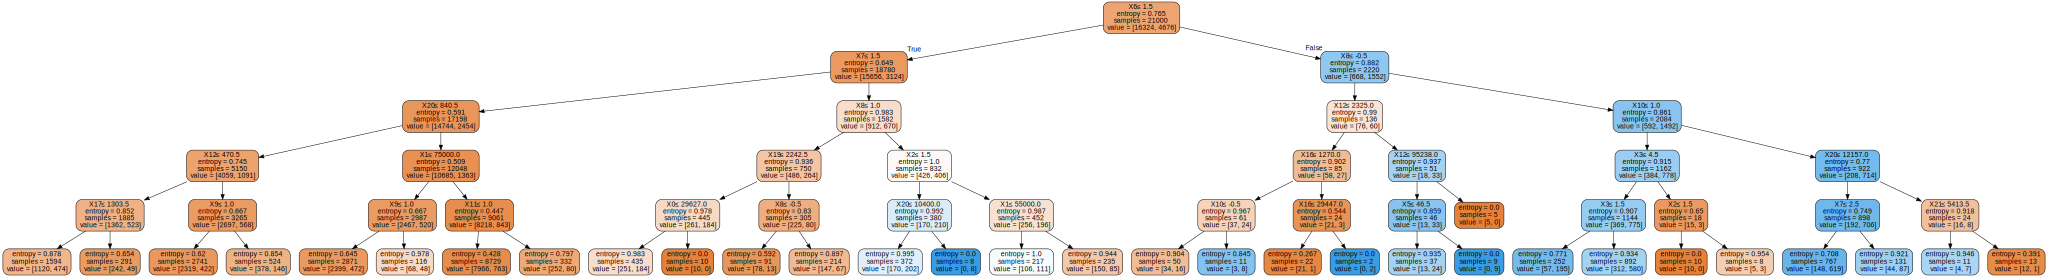

In [52]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from graphviz import Graph


dot_data = tree.export_graphviz(clf2, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data)  
graph

Utilizou-se algumas técnicas de ensemble.

### 1) Bagging Classifier

In [53]:
kfold = model_selection.KFold(n_splits=10)

In [54]:
model1 = BaggingClassifier(base_estimator=clf2, n_estimators=100, random_state=10)

In [55]:
result1 = model_selection.cross_val_score(model1, x_train, y_train, cv=kfold)

In [56]:
print(result1.mean())

0.8205238095238097


## 2) Random Forest

In [57]:
kfold_rf = model_selection.KFold(n_splits=10)
model_rf = RandomForestClassifier(n_estimators=100, max_features=5)
results_rf = model_selection.cross_val_score(model_rf, x_train,y_train, cv=kfold_rf)
print(results_rf.mean())

0.8188571428571428


## 3) AdaBoost

In [58]:
kfold_ada = model_selection.KFold(n_splits=10)
model_ada = AdaBoostClassifier(n_estimators=30)
results_ada = model_selection.cross_val_score(model_ada, x_train,y_train, cv=kfold_ada)
print(results_ada.mean())

0.8168095238095239


Verifica-se que o método de Bagging Classifier foi o que obteve melhor resultado.